# 🏠 California Housing: Statistical Analysis & Pipeline

**Project Source:** Based on Advanced Statistics

**Objective:** Migrate a legacy Mathematica statistical analysis to a modern Python workflow, focusing on data integrity, distribution testing, and feature correlation.

## 📊 Phase 1: Data Acquisition & Initial Audit
**Objective:** Load the raw dataset and perform a metadata check.
*   **Principle:** Verify dataset dimensions and column schemas to ensure successful ingestion before cleaning.

In [13]:
import pandas as pd

# Principle: "Relative Pathing"
# '../' moves up one folder (out of notebooks), then we go into data/raw
file_path = '../data/raw/housing.csv'

# Load the data into a DataFrame (df)
df = pd.read_csv(file_path)

# Principle: "Dimensions & Discovery" (Replicating PDF Page 16, 2a)
print(f"Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns.")
print("\nColumn Names found:")
print(df.columns.tolist())

# Show the first 5 rows (The 'TableForm' equivalent)
df.head()

Dataset loaded successfully with 20640 rows and 10 columns.

Column Names found:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 🧹 Phase 2: Data Quality & Missingness
**Objective:** Identify data gaps (NAs) within the 20,640 records.
*   **Discovery:** Identified 207 missing values in the `totalBedrooms` feature, necessitating a strategy for data imputation or exclusion.

In [14]:
# Principle: "Descriptive Statistics" 
# .T (Transpose) flips the table to make it easier to read
# We add a column to count missing values (NAs) exactly like your PDF
summary = df.describe().T
summary['#NA'] = df.isnull().sum()

print("--- Statistical Summary of Housing Data ---")
display(summary)

--- Statistical Summary of Housing Data ---


,count,mean,std,min,25%,50%,75%,max,#NA
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100,0
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500,0
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000,0
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000,0
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000,207
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000,0
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000,0
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001,0
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000,0


## ⚙️ Phase 3: Data Cleaning & Standardisation
**Objective:** Replicate the `defColNames` function by converting snake_case identifiers to CamelCase.
*   **Standard:** `total_rooms` → `totalRooms`, `median_income` → `medianIncome`.

In [15]:
# # Problem a: Change name pipeline (optional in python)
rename_map = {
    'housing_median_age': 'housingMedianAge',
    'total_rooms': 'totalRooms',
    'total_bedrooms': 'totalBedrooms',
    'median_income': 'medianIncome',
    'median_house_value': 'medianHouseValue',
    'ocean_proximity': 'oceanProximity'
}

# Apply the change
df = df.rename(columns=rename_map)

# Principle: "Verification"
# Print the new names to ensure the pipeline worked
print("Pipeline Result: New Column Names")
print(df.columns.tolist())

Pipeline Result: New Column Names
['longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome', 'medianHouseValue', 'oceanProximity']


## 🔍 Phase 4: Anomaly Detection & Visual Discovery
**Objective:** Investigate the distribution of house ages to find "strange" data artifacts.
*   **Insight:** Detected a massive "spike" at 52 years, indicating **Data Capping** (Censored Data) where all older houses were grouped into a single category.

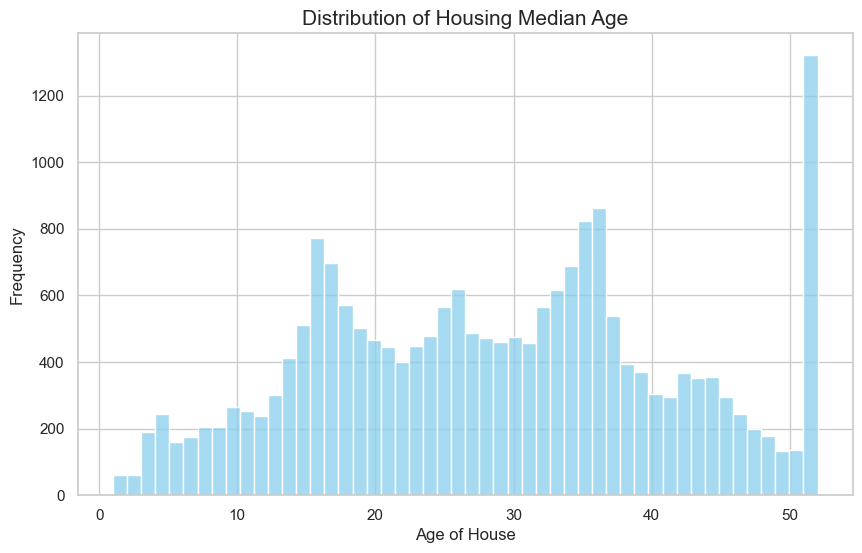

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set_theme(style="whitegrid")

# Problem b: Plot the histogram of housingMedianAge
plt.figure(figsize=(10, 6))
sns.histplot(df['housingMedianAge'], bins=50, color='skyblue', kde=False)

plt.title('Distribution of Housing Median Age', fontsize=15)
plt.xlabel('Age of House', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

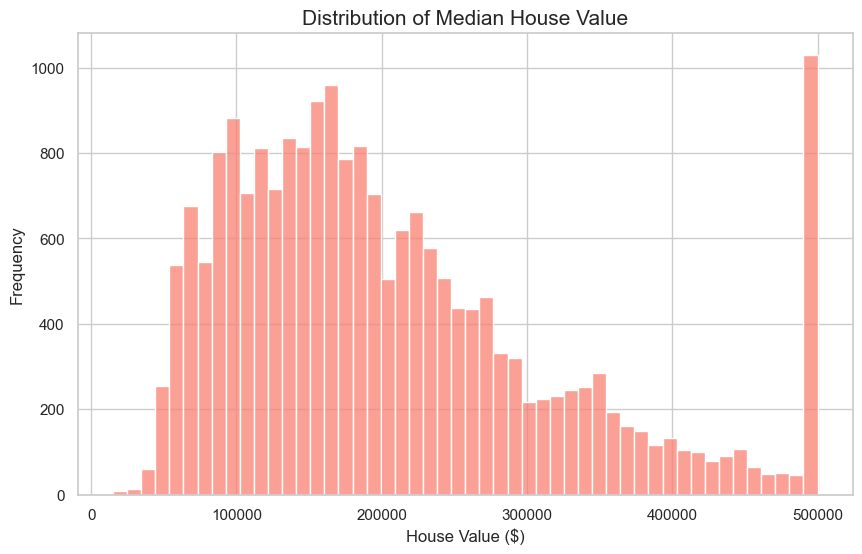

The maximum value is: $500001.0
Number of houses capped at this price: 965


In [17]:
# Problem c: Plot the histogram of medianHouseValue
plt.figure(figsize=(10, 6))
sns.histplot(df['medianHouseValue'], bins=50, color='salmon', kde=False)

plt.title('Distribution of Median House Value', fontsize=15)
plt.xlabel('House Value ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Verification: How many houses are at the maximum value?
max_val = df['medianHouseValue'].max()
capped_count = len(df[df['medianHouseValue'] == max_val])
print(f"The maximum value is: ${max_val}")
print(f"Number of houses capped at this price: {capped_count}")

## ✂️ Phase 5: Noise Reduction & Data Filtration
**Objective:** Remove unreliable records identified in the visual audit.
*   **Action:** Excluded 2,068 records (Age >= 52 and Value >= $500,001) to ensure statistical analysis reflects true market variations.

Original points: 20640
Filtered points: 18572
Points excluded: 2068 (unreliable data)


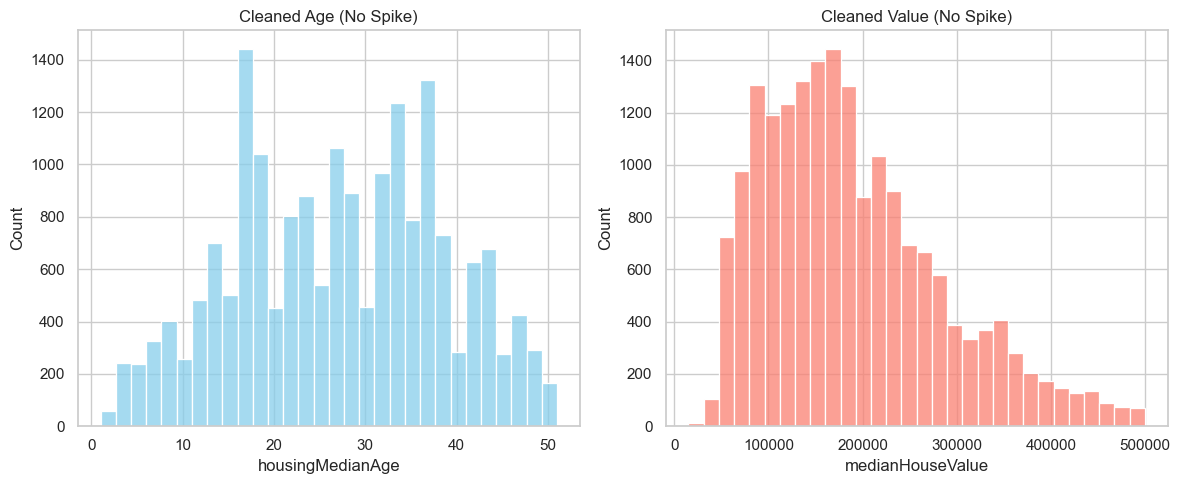

In [18]:
# Problem 2d: Remove the 'unreliable' capped data
# We keep only houses with age < 52 and value < 500,001
df_filtered = df[(df['housingMedianAge'] < 52) & (df['medianHouseValue'] < 500001)]

# Verification: Compare the size before and after
points_removed = len(df) - len(df_filtered)
print(f"Original points: {len(df)}")
print(f"Filtered points: {len(df_filtered)}")
print(f"Points excluded: {points_removed} (unreliable data)")

# Plot the 'Clean' distributions to verify the anomalies are gone
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_filtered['housingMedianAge'], bins=30, color='skyblue')
plt.title('Cleaned Age (No Spike)')

plt.subplot(1, 2, 2)
sns.histplot(df_filtered['medianHouseValue'], bins=30, color='salmon')
plt.title('Cleaned Value (No Spike)')

plt.tight_layout()
plt.show()

## 🧪 Phase 6: Normality Testing (Quantile-Quantile)
**Objective:** Test the assumption of a Normal Distribution for house values.
*   **Method:** Utilised **Q-Q Plots** to compare sample quantiles against theoretical quantiles.
*   **Conclusion:** The data deviates from the diagonal, proving a non-normal distribution with heavy tails.

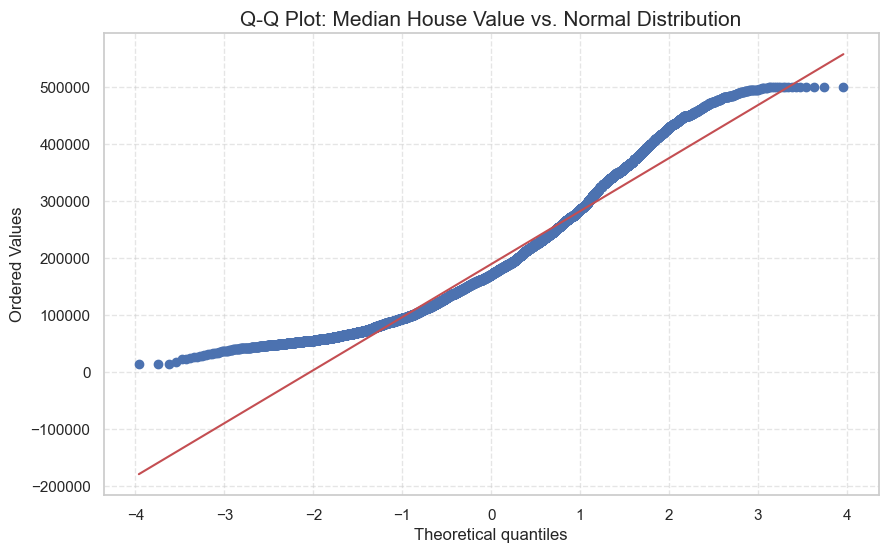

In [19]:
import scipy.stats as stats

# Problem 2e: Test the Normal Distribution assumption
plt.figure(figsize=(10, 6))

# Create a Q-Q plot comparing our data to a perfect normal distribution
stats.probplot(df_filtered['medianHouseValue'], dist="norm", plot=plt)

plt.title('Q-Q Plot: Median House Value vs. Normal Distribution', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## 🏛️ Phase 7: Categorical Aggregation
**Objective:** Quantify the impact of geographical proximity to the ocean on house valuation.
*   **Insight:** Houses in **ISLAND** and **NEAR BAY** categories command the highest market premiums.

--- House Value by Ocean Proximity ---


,mean,std,count
oceanProximity,,,
ISLAND,368750.000000,114904.851943,2
NEAR OCEAN,227192.955326,101134.727894,2328
NEAR BAY,224600.382897,98761.133908,1567
<1H OCEAN,223167.038771,85854.570781,8331
INLAND,123044.829288,65426.458744,6344


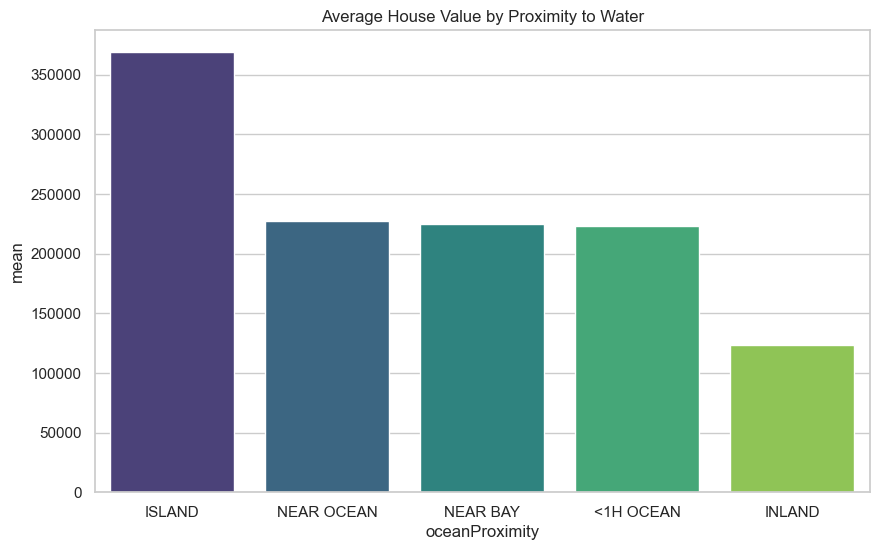

In [20]:
# Problem 2f: Display mean house value for each category in oceanProximity
# We use our 'Filtered' data to ensure the averages aren't ruined by the $500k cap
ocean_stats = df_filtered.groupby('oceanProximity')['medianHouseValue'].agg(['mean', 'std', 'count']).sort_values(by='mean', ascending=False)

print("--- House Value by Ocean Proximity ---")
display(ocean_stats)

# Visualising the difference (Principle: Data Storytelling)
plt.figure(figsize=(10, 6))
sns.barplot(x=ocean_stats.index, y=ocean_stats['mean'], palette='viridis', hue=ocean_stats.index, legend=False)
plt.title('Average House Value by Proximity to Water')
plt.show()

## 📈 Phase 8: Correlation & Feature Importance
**Objective:** Identify the primary driver of property value using Pearson Correlation coefficients.
*   **Result:** **Median Income** emerged as the strongest predictor of house value, showing a clear linear relationship in the scatter plot.

--- Correlation with House Value ---
medianHouseValue    1.000000
medianIncome        0.661039
totalRooms          0.152606
households          0.100220
totalBedrooms       0.079721
population          0.021616
housingMedianAge    0.014772
longitude          -0.022165
latitude           -0.172126
Name: medianHouseValue, dtype: float64

The variable most correlated with House Value is: medianIncome


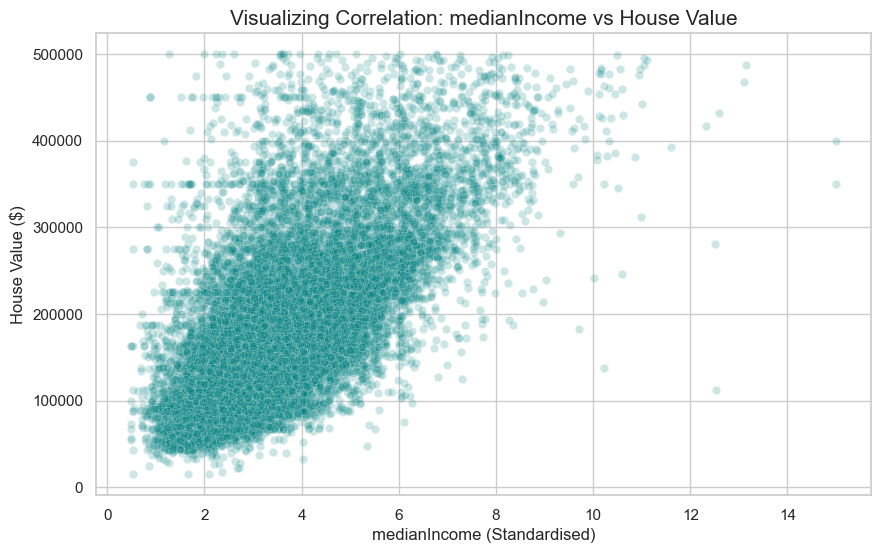

In [21]:
# Problem 2g: Calculate correlations for all numeric variables
# We ignore 'totalBedrooms' as per the instructions
import numpy as np
numeric_cols = df_filtered.select_dtypes(include=[np.number]).columns
correlations = df_filtered[numeric_cols].corr()['medianHouseValue'].sort_values(ascending=False)

print("--- Correlation with House Value ---")
print(correlations)

# Identify the winner
strongest_var = correlations.index[1] # index 0 is house value itself (1.0)
print(f"\nThe variable most correlated with House Value is: {strongest_var}")

# Replicating PDF Page 11: Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x=strongest_var, y='medianHouseValue', alpha=0.2, color='teal')

plt.title(f'Visualizing Correlation: {strongest_var} vs House Value', fontsize=15)
plt.xlabel(f'{strongest_var} (Standardised)', fontsize=12)
plt.ylabel('House Value ($)', fontsize=12)
plt.show()